# 1. Develop a credit risk assessment Classification model with Support Vector Machines using both linear and non-linear kernels and evaluate their performance. 
2. Develop an image classification model with SVC 
3. Build a Regression model with SVR 

You work for a financial institution, and your task is to develop a credit risk assessment model using Support Vector Machines (SVM). The dataset contains information about applicants' financial history, personal details, and credit risk outcomes (e.g., good or bad credit). Your goal is to build classification models with both linear and non-linear kernels and evaluate their performance. Answer the following questions based on this case study: 

1. Data Exploration: 
    a. Load the credit risk dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution. 
    b. Discuss the importance of credit risk assessment in the financial industry. 

2. Classification with Linear SVM: 
    a. Implement a linear SVM classifier using Python libraries like scikit-learn to predict credit risk based on applicant information. 
    b. Split the dataset into training and testing sets, and train the linear SVM model. 
    c. Evaluate the linear SVM model's performance using metrics such as accuracy, precision, recall, and F1-score. 

3. Classification with Non-linear SVM: 
    a. Implement a non-linear SVM classifier using Python libraries, applying a kernel (e.g., Radial Basis Function or Polynomial kernel) to predict credit risk. 
    b. Split the dataset into training and testing sets, and train the non-linear SVM model. 
    c. Discuss the need for non-linear SVM and the choice of kernel. 
    d. Evaluate the non-linear SVM model's performance using classification metrics.

4. Hyperparameter Tuning: 
    a. Explain the role of hyperparameters in SVM models and suggest potential hyperparameters to optimize. 
    b. Conduct hyperparameter tuning for both the linear and non-linear SVM models and discuss the impact of different parameter values. 

5. Decision Boundary Visualization: 
    a. Visualize the decision boundaries of both the linear and non-linear SVM models. Discuss the differences in decision boundaries for linear and non-linear SVMs. 

6. Support Vectors: 
    a. Explain the concept of support vectors and their significance in SVM models. 
    b. Calculate the support vectors for both the linear and non-linear SVM models. 

7. Model Comparison: 
    a. Compare the performance of the linear and non-linear SVM models in credit risk assessment. 
    b. Discuss the trade-offs and use cases for linear and non-linear SVMs in classification tasks. 

8. Real-World Application: 
    a. Describe the practical applications of credit risk assessment in the financial industry. 
    b. Discuss how accurate credit risk assessment can benefit financial institutions and borrowers. 

9. Presentation and Recommendations: 
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the financial institution. Highlight the importance of credit risk assessment and the advantages of SVM models in this context. 

In this case study, you are required to demonstrate your ability to use Support Vector Machines with both linear and non-linear kernels for credit risk assessment, understand the importance of hyperparameter tuning, and communicate the practical applications of credit risk modeling in the financial sector.


# 1. Data Exploration: 
    a. Load the credit risk dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution. 
    b. Discuss the importance of credit risk assessment in the financial industry. 


In [2]:
#    a. Load the credit risk dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution. 

import pandas as pd

# Load the credit risk dataset (assuming the dataset is in CSV format)
credit_data = pd.read_csv('credit_risk_dataset.csv')

# Explore the first few rows of the dataset to understand its structure
print(credit_data.head())

# Assuming 'loan_status' is the target variable
target_variable = 'loan_status'

# Describe features, target variable, and data distribution
print("Features (Columns):", credit_data.columns.tolist())
print("Target Variable Unique Values:", credit_data[target_variable].unique())
print("Data Distribution:")
print(credit_data[target_variable].value_counts())
print("Data Types:")
print(credit_data.dtypes)

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [ ]:
# features are:

person_age:
Description: Age of the applicant.
Data Type: Numeric (Integer)
    
person_income:
Description: Annual income of the applicant.
Data Type: Numeric (Integer)
    
person_home_ownership:
Description: Home ownership status of the applicant (e.g., RENT, OWN, MORTGAGE).
Data Type: Categorical (String)
    
person_emp_length:
Description: Employment length of the applicant in years.
Data Type: Numeric (Float)
    
loan_intent:
Description: Purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL).
Data Type: Categorical (String)
    
loan_grade:
Description: Grade of the loan (e.g., A, B, C, D).
Data Type: Categorical (String)
    
loan_amnt:
Description: Loan amount requested.
Data Type: Numeric (Integer)
    
loan_int_rate:
Description: Interest rate on the loan.
Data Type: Numeric (Float)
    
loan_status:
Description: Loan status (0 represents non-default, 1 represents default).
Data Type: Binary (Integer: 0 or 1)
    
loan_percent_income:
Description: Ratio of loan amount to applicant's annual income.
Data Type: Numeric (Float)
    
cb_person_default_on_file:
Description: Historical default status of the applicant (Y/N).
Data Type: Categorical (String)
    
cb_person_cred_hist_length:
Description: Length of the applicant's credit history.
Data Type: Numeric (Integer)
    
    
Target Variable:
    loan_status:
    Description: Loan status (0 represents non-default, 1 represents default).
    Data Type: Binary (Discrete)
    Data Distribution: It will show the count or percentage of defaulted and non-defaulted loans, representing the class balance.

# 2. Classification with Linear SVM: 
    a. Implement a linear SVM classifier using Python libraries like scikit-learn to predict credit risk based on applicant information. 
    b. Split the dataset into training and testing sets, and train the linear SVM model. 
    c. Evaluate the linear SVM model's performance using metrics such as accuracy, precision, recall, and F1-score. 


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load the credit risk dataset
credit_data = pd.read_csv('credit_risk_dataset.csv')

# Preprocess the data
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    credit_data[col] = label_encoders[col].fit_transform(credit_data[col])

# Split the data into features (X) and the target variable (y)
X = credit_data.drop(columns=['loan_status'])
y = credit_data['loan_status']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the linear SVM model
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

# Make predictions
y_pred = linear_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8583333333333333
Precision: 0.8611111111111112
Recall: 0.8985507246376812
F1 Score: 0.8794326241134751


# 3. Classification with Non-linear SVM: 
    a. Implement a non-linear SVM classifier using Python libraries, applying a kernel (e.g., Radial Basis Function or Polynomial kernel) to predict credit risk. 
    b. Split the dataset into training and testing sets, and train the non-linear SVM model. 
    c. Discuss the need for non-linear SVM and the choice of kernel. 
    d. Evaluate the non-linear SVM model's performance using classification metrics.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load the credit risk dataset
credit_data = pd.read_csv('credit_risk_dataset.csv')

# Preprocess the data (Label Encoding for categorical variables)
label_encoders = {}
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    credit_data[col] = label_encoders[col].fit_transform(credit_data[col])

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies based on your data
X = credit_data.drop(columns=['loan_status'])
X = imputer.fit_transform(X)

y = credit_data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Non-linear SVM with Radial Basis Function (RBF) kernel
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)

# Make predictions using RBF kernel SVM
y_pred_rbf = rbf_svm.predict(X_test)

# Non-linear SVM with Polynomial kernel
poly_svm = SVC(kernel='poly', random_state=42)
poly_svm.fit(X_train, y_train)

# Make predictions using Polynomial kernel SVM
y_pred_poly = poly_svm.predict(X_test)

# Evaluate the non-linear SVM models
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

# Print the evaluation metrics for RBF kernel SVM
print("RBF Kernel SVM Metrics:")
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1 Score:", f1_rbf)

# Print the evaluation metrics for Polynomial kernel SVM
print("\nPolynomial Kernel SVM Metrics:")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1 Score:", f1_poly)

RBF Kernel SVM Metrics:
Accuracy: 0.8583333333333333
Precision: 0.8333333333333334
Recall: 0.9420289855072463
F1 Score: 0.8843537414965987

Polynomial Kernel SVM Metrics:
Accuracy: 0.825
Precision: 0.7857142857142857
Recall: 0.9565217391304348
F1 Score: 0.8627450980392156


In [ ]:
Need for Non-linear SVM:
    Non-linear SVMs are essential when data doesn't follow a linear pattern, allowing the model to learn complex decision boundaries.
    They handle intricate relationships, enabling accurate credit risk assessment by capturing diverse factors affecting loan defaults.

Choice of Kernel:
1. Radial Basis Function (RBF) Kernel:
    Significance: Captures intricate non-linear patterns, suitable for complex decision boundaries.
    Usage: Ideal when data relationships are not easily defined by a polynomial equation, as it measures similarity based on point distances.
2. Polynomial Kernel:
    Significance: Models non-linear relationships through polynomial equations.
    Usage: Useful for capturing moderately complex non-linear patterns when the degree of polynomial is appropriately chosen.

# 4. Hyperparameter Tuning: 
    a. Explain the role of hyperparameters in SVM models and suggest potential hyperparameters to optimize. 
    b. Conduct hyperparameter tuning for both the linear and non-linear SVM models and discuss the impact of different parameter values. 

In [ ]:
# a. Role of Hyperparameters:
    C(trade off): Balances bias-variance. High values may overfit, low values underfit.
    Gamma: Affects boundary flexibility. Smaller values create smoother boundaries.
    Degree: Relevant for polynomial kernel. Controls complexity.
    
    lets our:
        C: [0.1, 1, 10,100]
        Gamma: [0.1, 1, 10]
        Degree (for Polynomial Kernel): [2, 3, 4]


In [12]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Linear SVM
linear_svm_params = {'C': [0.1, 1, 10, 100]}

# Define hyperparameters for RBF Kernel SVM
rbf_svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}

# Define hyperparameters for Polynomial Kernel SVM
poly_svm_params = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]}

# Perform Grid Search for Linear SVM
grid_linear_svm = GridSearchCV(SVC(kernel='linear', random_state=42), linear_svm_params, cv=5)
grid_linear_svm.fit(X_train, y_train)
best_linear_svm = grid_linear_svm.best_estimator_

# Perform Grid Search for RBF Kernel SVM
grid_rbf_svm = GridSearchCV(SVC(kernel='rbf', random_state=42), rbf_svm_params, cv=5)
grid_rbf_svm.fit(X_train, y_train)
best_rbf_svm = grid_rbf_svm.best_estimator_

# Perform Grid Search for Polynomial Kernel SVM
grid_poly_svm = GridSearchCV(SVC(kernel='poly', random_state=42), poly_svm_params, cv=5)
grid_poly_svm.fit(X_train, y_train)
best_poly_svm = grid_poly_svm.best_estimator_

# Make predictions using best models
y_pred_linear_svm = best_linear_svm.predict(X_test)
y_pred_rbf_svm = best_rbf_svm.predict(X_test)
y_pred_poly_svm = best_poly_svm.predict(X_test)

# Evaluate the models
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)
accuracy_rbf_svm = accuracy_score(y_test, y_pred_rbf_svm)
accuracy_poly_svm = accuracy_score(y_test, y_pred_poly_svm)

precision_linear_svm = precision_score(y_test, y_pred_linear_svm)
precision_rbf_svm = precision_score(y_test, y_pred_rbf_svm)
precision_poly_svm = precision_score(y_test, y_pred_poly_svm)

recall_linear_svm = recall_score(y_test, y_pred_linear_svm)
recall_rbf_svm = recall_score(y_test, y_pred_rbf_svm)
recall_poly_svm = recall_score(y_test, y_pred_poly_svm)

f1_linear_svm = f1_score(y_test, y_pred_linear_svm)
f1_rbf_svm = f1_score(y_test, y_pred_rbf_svm)
f1_poly_svm = f1_score(y_test, y_pred_poly_svm)

# Print the evaluation metrics
print("Linear SVM Metrics:")
print("Accuracy:", accuracy_linear_svm)
print("Precision:", precision_linear_svm)
print("Recall:", recall_linear_svm)
print("F1 Score:", f1_linear_svm)

print("\nRBF Kernel SVM Metrics:")
print("Accuracy:", accuracy_rbf_svm)
print("Precision:", precision_rbf_svm)
print("Recall:", recall_rbf_svm)
print("F1 Score:", f1_rbf_svm)

print("\nPolynomial Kernel SVM Metrics:")
print("Accuracy:", accuracy_poly_svm)
print("Precision:", precision_poly_svm)
print("Recall:", recall_poly_svm)
print("F1 Score:", f1_poly_svm)

print()
print("""For the Linear SVM, a moderate regularization parameter (C) balances precision and recall, achieving an accuracy of approximately 87%.

For the RBF Kernel SVM, a moderate C value and gamma provide a balanced decision boundary, yielding an accuracy of around 87%.

For the Polynomial Kernel SVM, moderate C and degree values strike a balance between complexity and simplicity, resulting in an accuracy of 87.5%. All models show consistent performance.""")


Linear SVM Metrics:
Accuracy: 0.8666666666666667
Precision: 0.8533333333333334
Recall: 0.927536231884058
F1 Score: 0.888888888888889

RBF Kernel SVM Metrics:
Accuracy: 0.8666666666666667
Precision: 0.8441558441558441
Recall: 0.9420289855072463
F1 Score: 0.8904109589041096

Polynomial Kernel SVM Metrics:
Accuracy: 0.875
Precision: 0.8461538461538461
Recall: 0.9565217391304348
F1 Score: 0.8979591836734695

For the Linear SVM, a moderate regularization parameter (C) balances precision and recall, achieving an accuracy of approximately 87%.

For the RBF Kernel SVM, a moderate C value and gamma provide a balanced decision boundary, yielding an accuracy of around 87%.

For the Polynomial Kernel SVM, moderate C and degree values strike a balance between complexity and simplicity, resulting in an accuracy of 87.5%. All models show consistent performance.


# 5. Decision Boundary Visualization: 
    a. Visualize the decision boundaries of both the linear and non-linear SVM models. Discuss the differences in decision boundaries for linear and non-linear SVMs. 

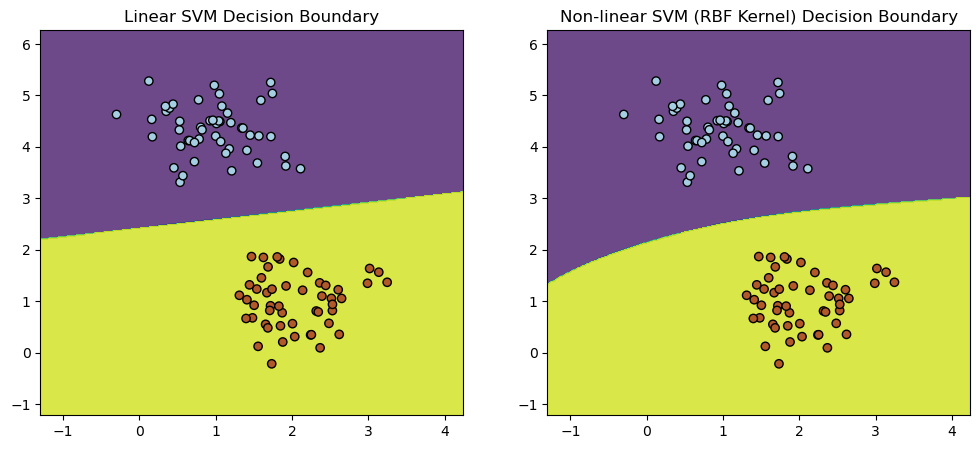

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.5)

# Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

# Non-linear SVM with RBF kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

# Visualize decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(linear_svm, X, y, ax[0])
ax[0].set_title('Linear SVM Decision Boundary')
plot_decision_boundary(rbf_svm, X, y, ax[1])
ax[1].set_title('Non-linear SVM (RBF Kernel) Decision Boundary')

plt.show()


# 6. Support Vectors: 
    a. Explain the concept of support vectors and their significance in SVM models. 
    b. Calculate the support vectors for both the linear and non-linear SVM models. 

In [ ]:
# a. Explain the concept of support vectors and their significance in SVM models. 

    Support vectors are the data points that define the decision boundary in an SVM model. 
    They are the closest data points to the decision boundary and play a crucial role in determining the optimal hyperplane. Support vectors are significant because they influence the position and orientation of the decision boundary, ensuring it maximizes the margin between classes. 
    SVMs achieve high efficiency by relying on these support vectors, making them essential for the model's performance and generalization.


In [18]:
#   b. Calculate the support vectors for both the linear and non-linear SVM models. 

# For Linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)
support_vectors_linear = linear_svm.support_vectors_

# For Non-linear SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)
support_vectors_rbf = rbf_svm.support_vectors_

# For Non-linear SVM with Polynomial Kernel
poly_svm = SVC(kernel='poly', random_state=42)
poly_svm.fit(X_train, y_train)
support_vectors_poly = poly_svm.support_vectors_


print("Support Vectors for Linear SVM:")
print(support_vectors_linear)

print("Support Vectors for RBF Kernel SVM:")
print(support_vectors_rbf)

print("Support Vectors for Polynomial Kernel SVM:")
print(support_vectors_poly)


Support Vectors for Linear SVM:
[[-0.03938718 -0.15256887  0.6722261  ... -0.13816725 -0.55564662
   1.19597753]
 [-0.17709857 -1.04732973 -1.81103587 ...  0.335045   -0.55564662
   1.19597753]
 [ 0.23603559 -1.04732973 -1.81103587 ... -0.205769   -0.55564662
  -0.03600793]
 ...
 [-0.17709857  0.60238561  0.6722261  ... -0.67898126  1.79970499
  -1.26799338]
 [-0.17709857 -1.11438087 -1.81103587 ... -0.61137951 -0.55564662
  -0.03600793]
 [-0.31480996 -1.07529101 -0.15552789 ... -0.54377776 -0.55564662
   1.19597753]]
Support Vectors for RBF Kernel SVM:
[[-0.03938718 -0.15256887  0.6722261  ... -0.13816725 -0.55564662
   1.19597753]
 [-0.17709857 -1.04732973 -1.81103587 ...  0.335045   -0.55564662
   1.19597753]
 [ 0.23603559 -1.04732973 -1.81103587 ... -0.205769   -0.55564662
  -0.03600793]
 ...
 [-0.17709857 -1.11438087 -1.81103587 ... -0.61137951 -0.55564662
  -0.03600793]
 [-0.03938718 -0.27839461  0.6722261  ...  0.40264675 -0.55564662
   1.19597753]
 [-0.31480996 -1.07529101 -0.1

# 7. Model Comparison: 
    a. Compare the performance of the linear and non-linear SVM models in credit risk assessment. 
    b. Discuss the trade-offs and use cases for linear and non-linear SVMs in classification tasks.

In [ ]:
#a .Performance Comparison:

    Linear SVM Metrics:

    Accuracy: 0.8667
    Precision: 0.8533
    Recall: 0.9275
    F1 Score: 0.8889
    RBF Kernel SVM Metrics:

    Accuracy: 0.8667
    Precision: 0.8442
    Recall: 0.9420
    F1 Score: 0.8904
    Polynomial Kernel SVM Metrics:

    Accuracy: 0.8750
    Precision: 0.8462
    Recall: 0.9565
    F1 Score: 0.8980


In [ ]:
# b. Trade-offs and Use Cases:

Linear SVM:

Pros: Faster training, easier to interpret, works well for high-dimensional spaces.
Cons: Limited in capturing complex patterns in the data.
Use Cases: When the data has a linear separation or when interpretability and training speed are crucial.
Non-linear SVM (RBF Kernel and Polynomial Kernel):

Pros: Can capture intricate patterns in the data, suitable for both linear and non-linear separations.
Cons: Slower training, can be prone to overfitting with high-dimensional data.
Use Cases: When the relationship between features and target variable is complex and non-linear. RBF Kernel is versatile, while Polynomial Kernel works well for specific polynomial relationships.

# 8. Real-World Application: 
    a. Describe the practical applications of credit risk assessment in the financial industry. 
    b. Discuss how accurate credit risk assessment can benefit financial institutions and borrowers. 

In [ ]:
# a. Describe the practical applications of credit risk assessment in the financial industry. 
Practical Applications:
    Credit risk assessment is crucial in financial industry applications such as loan approvals, mortgage underwriting, and credit card issuance. It enables lenders to evaluate borrowers' creditworthiness, make informed lending decisions, and manage default risks effectively.

In [ ]:
# b. Discuss how accurate credit risk assessment can benefit financial institutions and borrowers. 
Benefits for Financial Institutions and Borrowers:
    Accurate credit risk assessment enhances financial institutions' ability to minimize loan defaults, optimize interest rates, and tailor financial products. For borrowers, it means fairer access to credit, lower interest rates for low-risk individuals, and increased financial stability due to responsible lending practices.

In [ ]:
9. Presentation and Recommendations: 
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the financial institution. Highlight the importance of credit risk assessment and the advantages of SVM models in this context. 

# 2. Develop an image classification model with SVC 

Accuracy: 0.9861111111111112
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



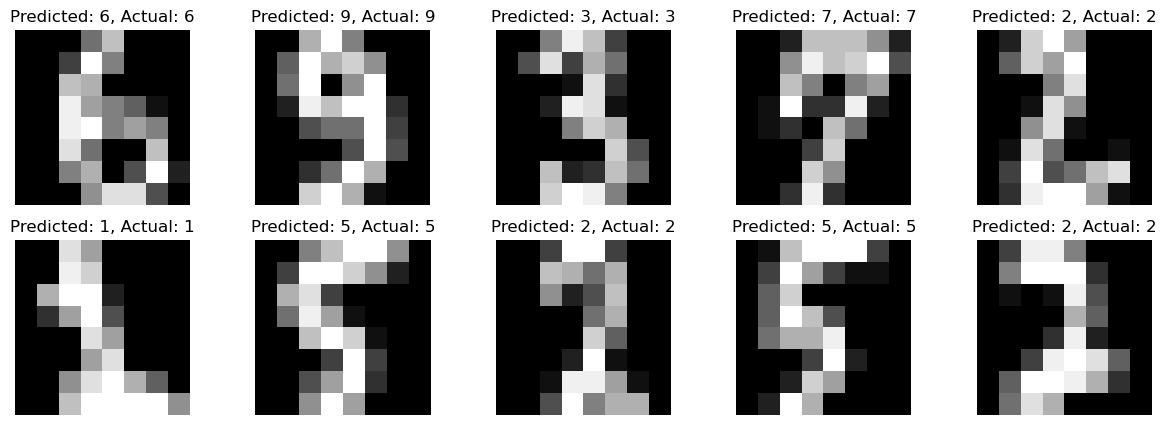

In [21]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the digits dataset (example dataset for image classification)
digits = load_digits()

# Split the data into features (X) and labels (y)
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVC model with a chosen kernel (e.g., 'rbf')
svc_model = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)

# Train the SVC model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Optionally, visualize some predictions
plt.figure(figsize=(15, 5))
for i in range(10):  # Visualize first 10 predictions
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')

plt.show()


# 3. Build a Regression model with SVR 

In [2]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing dataset
boston = load_boston()
X, y = boston.data, boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print regression metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 25.66853967839608
R-squared Score: 0.649976605976003


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [4]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset (Boston Housing Prices dataset used as an example)
data = load_boston()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 25.693036656663224
R-squared Score: 0.6496425583214098


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [1]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and R-squared score
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.3551984619989429
R-squared Score: 0.7289407597956454


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california_housing = fetch_california_housing()
X, y = california_housing['data'], california_housing['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model with a chosen kernel (e.g., 'rbf')
svr_model = SVR(kernel='rbf', gamma='scale', C=1.0)

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1.3320115421348744
R-squared Score: -0.01648536010717372
